In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [6]:
import joblib

### Read and Explore the Data

In [7]:
songs_data = pd.read_csv("/Users/oumaimamhz/Documents/1.TU Berlin/Advanced Data Science/data/songs_data.csv")
songs_data.head()

,track_id,track_name,track_artist,track_popularity,playlist_name,playlist_id,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [8]:
# check structure of data
songs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          32833 non-null  object 
 1   track_name        32828 non-null  object 
 2   track_artist      32828 non-null  object 
 3   track_popularity  32833 non-null  int64  
 4   playlist_name     32833 non-null  object 
 5   playlist_id       32833 non-null  object 
 6   genre             32833 non-null  object 
 7   danceability      32833 non-null  float64
 8   energy            32833 non-null  float64
 9   key               32833 non-null  int64  
 10  loudness          32833 non-null  float64
 11  mode              32833 non-null  int64  
 12  speechiness       32833 non-null  float64
 13  acousticness      32833 non-null  float64
 14  instrumentalness  32833 non-null  float64
 15  liveness          32833 non-null  float64
 16  valence           32833 non-null  float6

##### All columns have the same number of rows except for 'track_name' and 'track_artist', which means that they contain some NA values

In [9]:
#check the data's shape (nupmber of columns and rows)
songs_data.shape

(32833, 19)

##### We have 32,833 rows of data, and 19 potential features.

In [10]:
# check for missing data
songs_data.isnull().sum()

track_id            0
track_name          5
track_artist        5
track_popularity    0
playlist_name       0
playlist_id         0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

##### 'track_name' and 'track_artist' have 5 Null values each. Since it's a very low number we can delete them without having to worry about their effect on the balace of the dataset

In [11]:
# some exploratory work
songs_data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


#### We can see that 'duration_ms' has a different scale than the rest of the features

In [12]:
# we want to check the number of categories in each feature
songs_data.nunique()

track_id            28356
track_name          23449
track_artist        10692
track_popularity      101
playlist_name         449
playlist_id           471
genre                   6
danceability          822
energy                952
key                    12
loudness            10222
mode                    2
speechiness          1270
acousticness         3731
instrumentalness     4729
liveness             1624
valence              1362
tempo               17684
duration_ms         19785
dtype: int64

#### We notice that 'track_id', 'track_name' have a large number of categories compared to the other features.

In [13]:
# check the variance of the columns of the dataset 
songs_data.std()

track_popularity       24.984074
danceability            0.145085
energy                  0.180910
key                     3.611657
loudness                2.988436
mode                    0.495671
speechiness             0.101314
acousticness            0.219633
instrumentalness        0.224230
liveness                0.154317
valence                 0.233146
tempo                  26.903624
duration_ms         59834.006182
dtype: float64

##### All columns have a reasonable variance. No columns with very low variance to be dropped

In [14]:
#check the types of the data to check if there is feature we might want to encode
songs_data.dtypes

track_id             object
track_name           object
track_artist         object
track_popularity      int64
playlist_name        object
playlist_id          object
genre                object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
dtype: object

In [15]:
songs_data["genre"].value_counts(normalize=True)

edm      0.184053
rap      0.175007
pop      0.167728
r&b      0.165413
latin    0.157007
rock     0.150793
Name: genre, dtype: float64

<u><b>Insight:</b></u> Looks like the dataset is balanced as the percentage of each genre is more or less the same (ranges between 15% and 18%

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


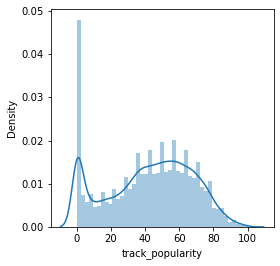

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


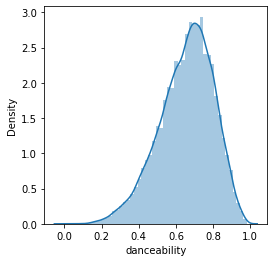

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


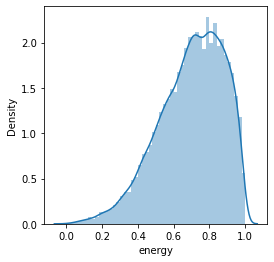

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


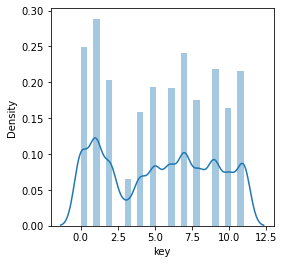

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


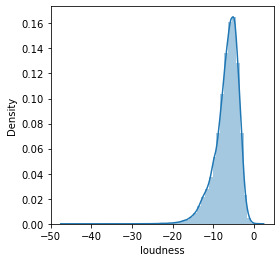

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


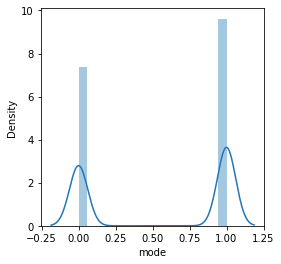

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


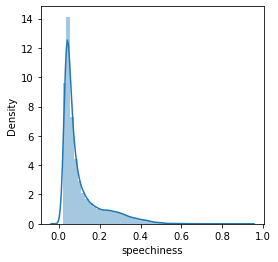

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


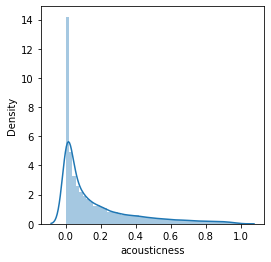

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


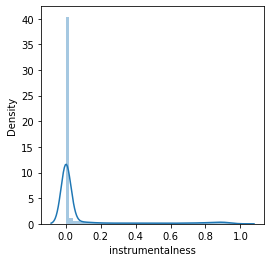

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


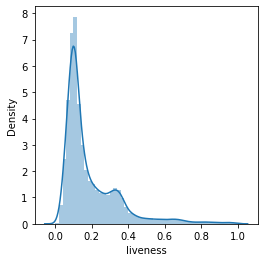

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


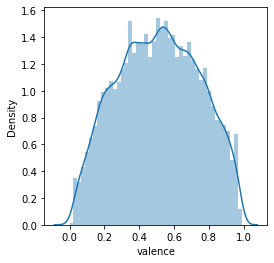

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


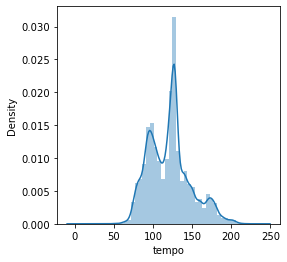

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


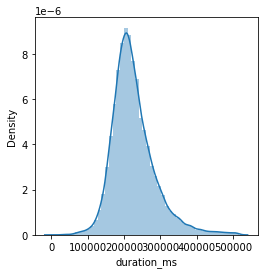

In [16]:
#identifying numerical columns
nums= songs_data.select_dtypes(exclude='object')

#Analyzing the distribution of numerical columns
for c in nums.columns:
    plt.figure(figsize=(4,4))
    sns.distplot(nums[c])
    plt.show();

##### => these plots show the distribution of each feature, just that we can identify if some feature are well distributed or skewed

<u><b>Insight:</b></u> We have noticed that some columns ('loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness') do not follow a gaussian distribution.

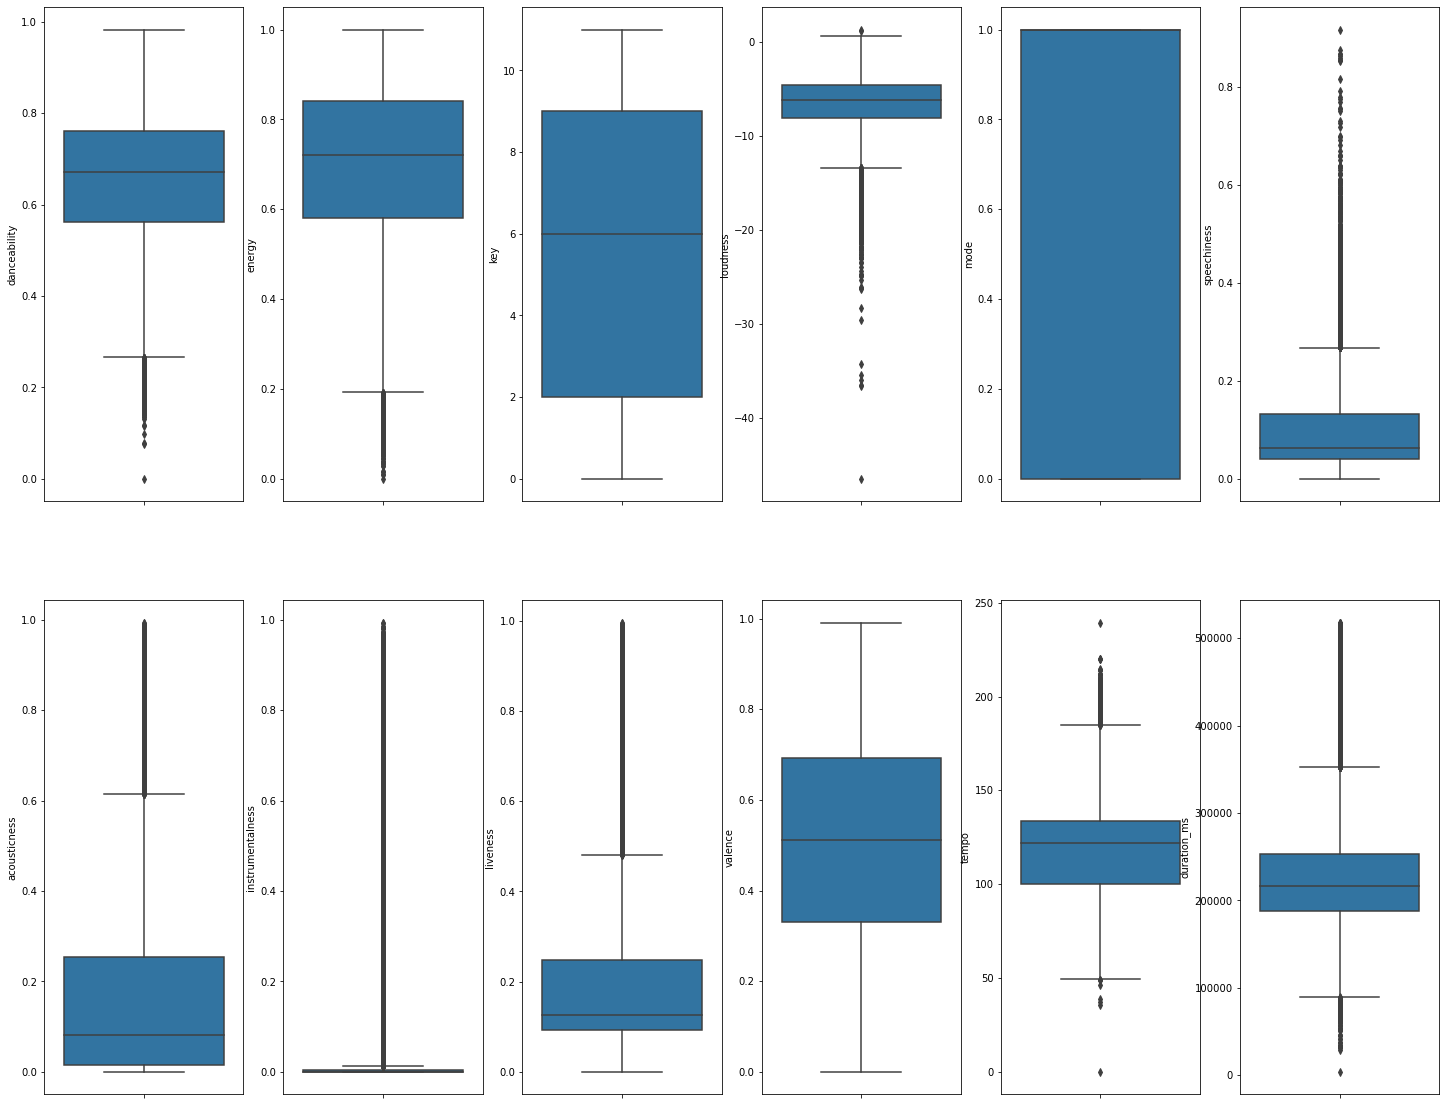

In [17]:
#box plot 
num_list = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
fig = plt.figure(figsize = (25, 20))

for i in range(len(num_list)):
    column = num_list[i]
    sub = fig.add_subplot(2, 6, i + 1)
    sns.boxplot(y = column, data = songs_data)
    

<u><b>Insight:</b></u> The code lines above help for displaying numeric features on boxplots. The latter are very useful for identifying outliers, i.e., extreme or wrong values in a feature. Outliers could distort model training and inference. For this reason, it is a good practice (whenever possible and justifiable) to remove them. A brief overview of outliers is given above in the plots.

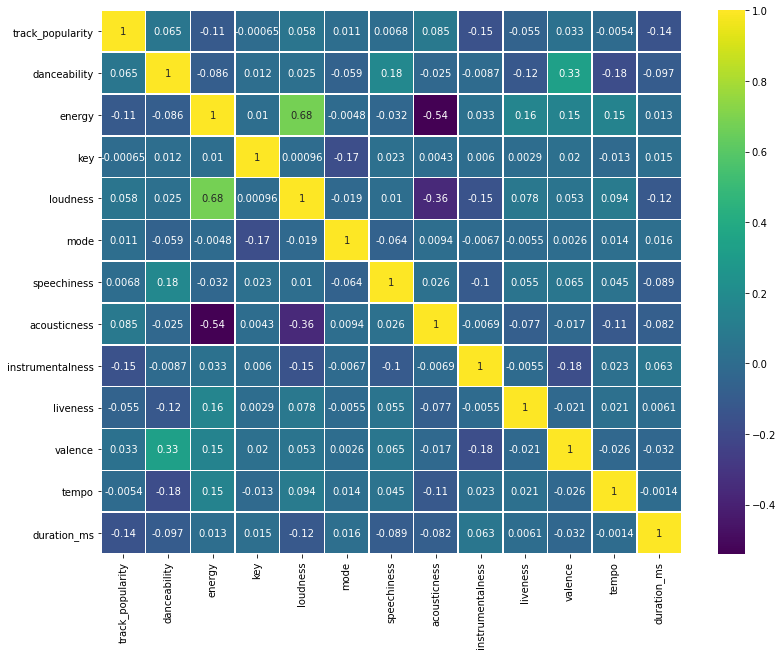

In [18]:
# see correlation between variables
fig = plt.figure(figsize = (13, 10))
sns.heatmap(songs_data.corr(), annot=True, cmap='viridis', linewidths=0.5);


#### What initial patterns are you observing? 
-'track_id', 'track_name', 'track_artist', 'track_popularity', 'playlist_name', 'playlist_id' do not have a strong connection with the genre.(Arguably, 'track_artist' would have a connection to the music genre, but I personally think there is too much variance and it wouldn't be a consistent pattern) <br>

-We notice that there is a negative correlation between 'acousticness' and 'energy' , whereas there is a positive correlation between 'loudness' and 'energy'.

#### How about data quality?
-We notice some heavily skewed columns such as 'speechiness', 'acousticness' and 'instrumentalness' <br>
-Also, some columns have a great number of outliers such as 'speechiness', 'instrumentalness' and 'liveness'.<br>A small number of outliers are seen in popularity, danceability, and tempo. On the other hand, many extreme values are found in duration, instrumentlness, liveness, loudness, and speechiness. Since the overall objective of this exercise is not devising the best model but to interpret classification outputs, outliers are not removed.

## Data Cleaning

In [19]:
# let's check for duplicates
print("# of duplicated rows of data:", 
      songs_data[songs_data.duplicated(keep = False)].shape[0])

# of duplicated rows of data: 646


In [20]:
# look at duplicated values
songs_data[songs_data.duplicated(keep = False)].head()

,track_id,track_name,track_artist,track_popularity,playlist_name,playlist_id,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
12900,5dIgg4mrQHOlVm1ZFYHW29,Smoke on the Water,Deep Purple,44,"Classic Rock 70s 80s 90s, Rock Classics - 70s ...",3Ho3iO0iJykgEQNbjB2sic,rock,0.608,0.688,5,-7.655,0,0.0296,0.134000,0.206000,0.0951,0.749,114.414,334240
12901,0oWHLtxWeMJhmwxtrxhNK0,Welcome To The Jungle,Guns N' Roses,1,"Classic Rock 70s 80s 90s, Rock Classics - 70s ...",3Ho3iO0iJykgEQNbjB2sic,rock,0.443,0.955,8,-8.066,1,0.0741,0.022200,0.361000,0.2970,0.333,123.423,273600
12902,48C69MxPGtl8Yk49ruZvIU,Ozone,New Politics,47,"Classic Rock 70s 80s 90s, Rock Classics - 70s ...",3Ho3iO0iJykgEQNbjB2sic,rock,0.594,0.866,9,-4.741,0,0.0828,0.031500,0.000586,0.0800,0.856,160.025,172221
12903,3EZEk457H0jGFXajWbk67G,Thirteen,Vivillain,35,"Classic Rock 70s 80s 90s, Rock Classics - 70s ...",3Ho3iO0iJykgEQNbjB2sic,rock,0.595,0.929,8,-6.480,1,0.0419,0.000148,0.158000,0.3340,0.493,92.508,162900
12904,2G2WsFEP8lqYr8vg1mPtyI,Fake,RedHook,47,"Classic Rock 70s 80s 90s, Rock Classics - 70s ...",3Ho3iO0iJykgEQNbjB2sic,rock,0.607,0.962,1,-3.072,1,0.0575,0.001240,0.000005,0.1390,0.795,120.055,181271


In [21]:
# we dropped all duplicated data and kept the first row

songs_data_cleaned = songs_data[~songs_data.duplicated(keep = 'first')]
print("shape of cleaned data:", songs_data_cleaned.shape)

shape of cleaned data: (32510, 19)


In [22]:
# drop features we identified as redundant

cols_to_drop = ['track_id', 'track_name', 'track_artist', 'track_popularity', 'playlist_name', 'playlist_id']
songs_data_cleaned = songs_data_cleaned.drop(cols_to_drop, axis = 1)
print(songs_data_cleaned.shape)

#the old shape of the data before we drop the redundant columns(32833, 19)

(32510, 13)


### Steps carried:
-First we checked for any duplicated rows and dropped them, keeping only the first row. <br>
-Then, we dropped all the redundant columns that we think that they have no direct connection to the genre ('track_id', 'track_name', 'track_artist', 'track_popularity', 'playlist_name', 'playlist_id')

## Feature engineering

In [23]:
#Encode the target variable
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'genre'.
songs_data_cleaned['genre']= label_encoder.fit_transform(songs_data_cleaned['genre'])
  
songs_data_cleaned['genre'].unique()

array([2, 4, 5, 1, 3, 0])

In [24]:
#This line of code just so that we map the encoded labels
label_encoder.inverse_transform([0, 1, 2, 3, 4, 5])

array(['edm', 'latin', 'pop', 'r&b', 'rap', 'rock'], dtype=object)

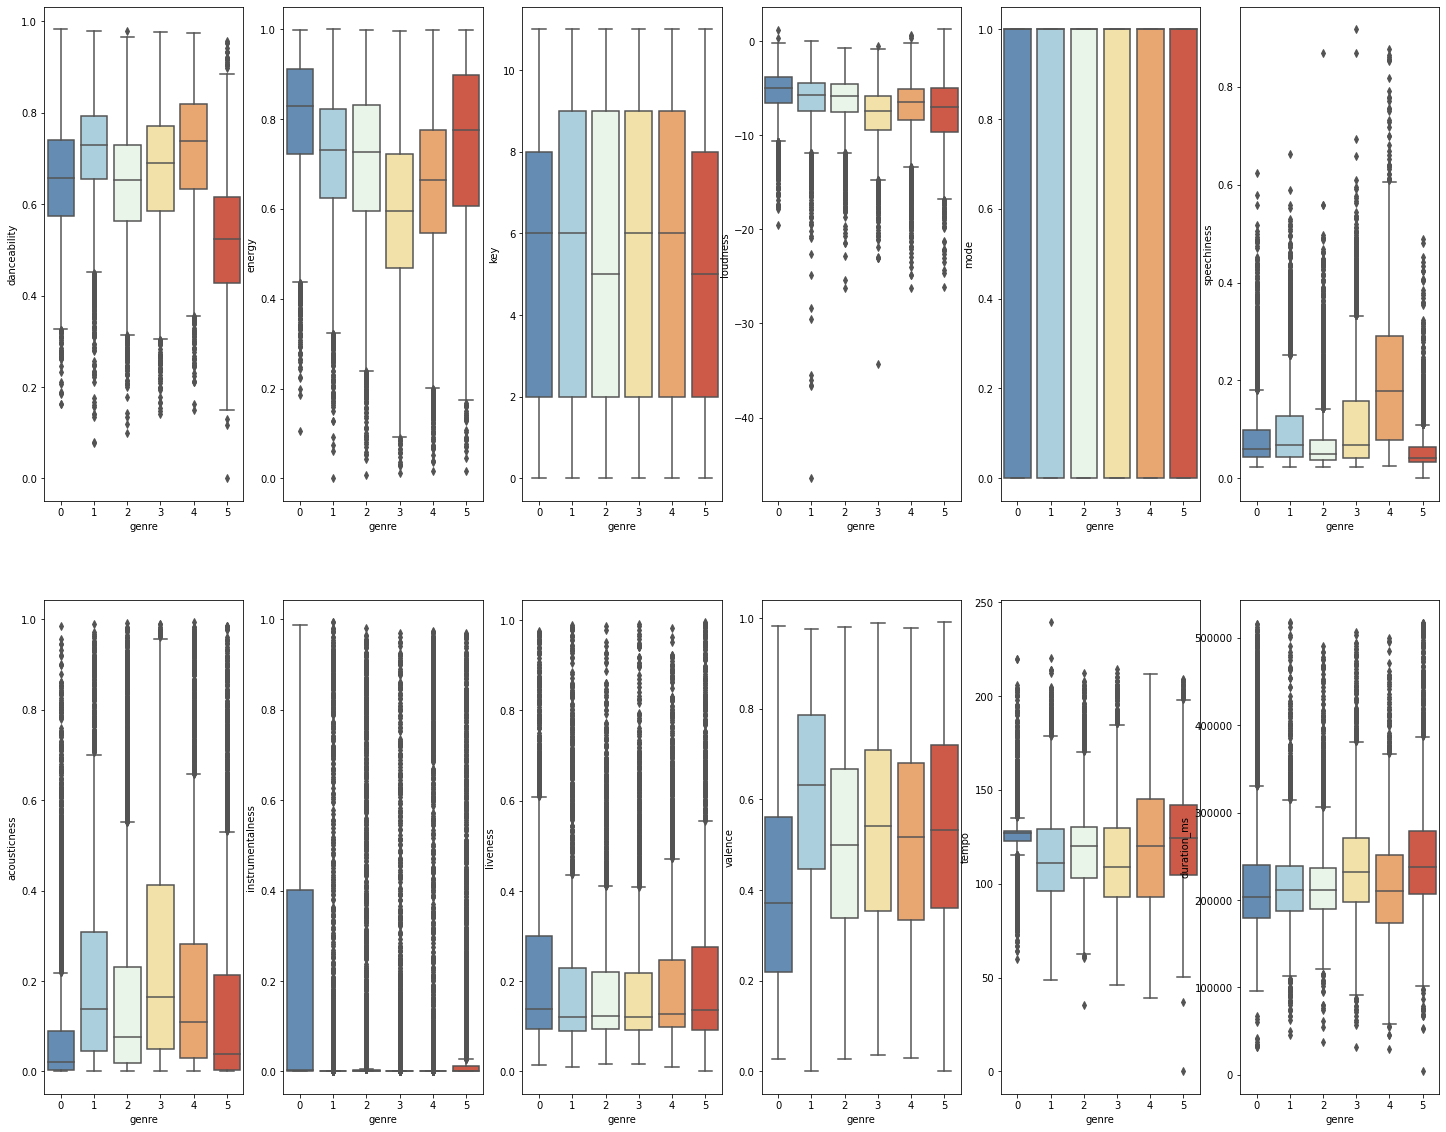

In [25]:
#box plot 
num_list = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
fig = plt.figure(figsize = (25, 20))

for i in range(len(num_list)):
    column = num_list[i]
    sub = fig.add_subplot(2, 6, i + 1)
    sns.boxplot(x = 'genre', y = column, data = songs_data_cleaned, palette = "RdYlBu_r")
    
    

##### => these plots show the relationship between our features and the target variable 'genre' across its types

### Steps carried:
-The target data type is an object so we had to encode it before building the machine learning model. <br>

### Split the data into train and test

In [26]:
#Defining the features and the target variable
target = songs_data_cleaned.genre
features = songs_data_cleaned.drop(['genre'], axis = 1)

In [27]:
#Split our data to train and test samples
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size = 0.2,
    random_state = 42)

In [28]:
# scale the data

scaler = StandardScaler()
scaler.fit(X_train)
# transform training data
X_train_scaled = scaler.transform(X_train)

##### We need to perform Feature Scaling when we are dealing with Gradient Descent Based algorithms such as Logistic Regression.

In [29]:
scaler = StandardScaler()
scaler.fit(X_test)
# transform training data
X_test_scaled = scaler.transform(X_test)

In [30]:
# print the shape of the training data

from collections import Counter
print("Training Data")
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)
print("Distribution of target:", Counter(y_train))

Training Data
Shape of X_train (26008, 12)
Shape of y_train (26008,)
Distribution of target: Counter({0: 4717, 4: 4567, 2: 4423, 3: 4326, 1: 4087, 5: 3888})


In [31]:
# print the shape of the test data 

print("Test Data")
print("Shape of X_test", X_test.shape)
print("Shape of y_test", y_test.shape)
print("Distribution of target:", Counter(y_test))

Test Data
Shape of X_test (6502, 12)
Shape of y_test (6502,)
Distribution of target: Counter({0: 1182, 4: 1179, 3: 1105, 2: 1084, 5: 978, 1: 974})


### Build and evaluate the Logistic Regression model

In [32]:
# Import and Fit the Decision Tree Model

clf = LogisticRegression()

clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [33]:
y_pred_clf = clf.predict(X_test_scaled) 
y_pred_clf

array([4, 0, 5, ..., 0, 5, 5])

In [34]:
# checking for the accuracy score for the test set

print("accuracy:", round(accuracy_score(y_test, y_pred_clf), 2))
print("recall:", round(recall_score(y_test, y_pred_clf, average = 'macro'), 2))
print("precision:", round(precision_score(y_test, y_pred_clf, average = 'macro'), 2))
print("f1-score:", round(f1_score(y_test, y_pred_clf, average = 'macro'), 2))

accuracy: 0.46
recall: 0.46
precision: 0.45
f1-score: 0.45


In [35]:
# check for signs of overfitting

y_pred_train_clf = clf.predict(X_train_scaled)

print("accuracy:", round(accuracy_score(y_train, y_pred_train_clf), 2))
print("recall:", round(recall_score(y_train, y_pred_train_clf, average = 'macro'), 2))
print("precision:", round(precision_score(y_train, y_pred_train_clf, average = 'macro'), 2))
print("f1-score:", round(f1_score(y_train, y_pred_train_clf, average = 'macro'), 2))

# high accuracy on training set, signs of variance between test and training set.

accuracy: 0.46
recall: 0.46
precision: 0.45
f1-score: 0.46


<u><b>Insight:</b></u> The model obtains 46% "accuracy" and "f1_score" on train data and the same results on test samples, which is considered as good results.

In [36]:
from sklearn.model_selection import learning_curve, cross_val_score


def learning_curve_plot(model, X_train, y_train, scoring):
    """Plots learning curves for model validation
    
    @param models - list of models we are interested in evaluating
    @param X_train - the training features
    @param y_train - the target
    
    @returns a plot of the learning curve
    """
    
    plt.figure(figsize=(5, 5)) # set figure size
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X_train,
        y_train,
        # Number of folds in cross-validation
        cv = 5,
        # Evaluation metric
        scoring = scoring,
        # Use all computer cores
        n_jobs = -1,
        shuffle = True,
        # 5 different sizes of the training set
        train_sizes = np.linspace(0.01, 1.0, 5))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color = "#111111", label = "Training score")
    plt.plot(train_sizes, test_mean, color = "#111111", label = "Cross-validation score")

    # Create plot
    plt.title("Learning Curves")
    plt.xlabel("Training Set Size"), plt.ylabel("Error"), plt.legend(loc = "best")
    plt.tight_layout()
    

    plt.show()

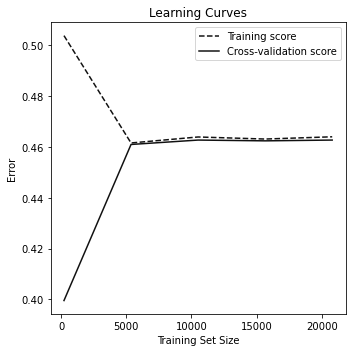

In [37]:
learning_curve_plot(clf, X_train_scaled, y_train, scoring = 'accuracy')

<u><b>Insight:</b></u> We can see that the gap between the training error curve and the testing error one is decreasing and they both plateau forming evetually a low gap.

In [38]:
# A confusion matrix is a table that is often used to describe the performance of a classification model
#.            (or "classifier") on a set of test data for which the true values are known
confusion_matrix(y_test, y_pred_clf)

array([[700,  74, 181,  58,  97,  72],
       [123, 369, 138, 120, 142,  82],
       [218, 164, 279, 138,  91, 194],
       [ 54, 140, 139, 441, 211, 120],
       [164, 159,  74, 143, 592,  47],
       [112,  58,  66, 105,  15, 622]])

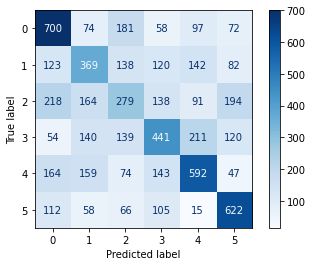

In [39]:
# can easily see where the model has incorrectly classified the data
ConfusionMatrixDisplay.from_estimator(clf,
                                      X_test_scaled,
                                      y_test,
                                      cmap = plt.cm.Blues);

<u><b>Insight:</b></u> Properly classified samples are shown on the diagonal - the squares colored in darker blue . It could be seen that True Positives (i.e., correct predictions) prevail. Wrong guessings are located below and above the diagonal. The genre of 700 songs was properly predicted as "edm" (=class 0). 123 were said to be "latin" (=class 1), 218 - "pop" (=Class 2), and so on, but their actual class was "edm" (=Class 0). On the other hand (on the horizontal rows), 74 songs identified as "edm" (=class 0) were in fact "latin", 181 are "pop" (=class 2), etc.

In [40]:
print(classification_report(y_test, y_pred_clf))

# the model is better at predicting the class 5 (= 'rock')

              precision    recall  f1-score   support

           0       0.51      0.59      0.55      1182
           1       0.38      0.38      0.38       974
           2       0.32      0.26      0.28      1084
           3       0.44      0.40      0.42      1105
           4       0.52      0.50      0.51      1179
           5       0.55      0.64      0.59       978

    accuracy                           0.46      6502
   macro avg       0.45      0.46      0.45      6502
weighted avg       0.45      0.46      0.46      6502



<u><b>Insight:</b></u> The classification_report shows "precision", "recall", and "f1" scores for all classes. Thus, it could be seen that the model is not very good at guessing the label of 'latin' (= class 1) and 'pop' (=class 2) but performs well for 'rock' music (=class 5).

### Build and Evaluate the Random Forest

In [41]:
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 5, 3])

In [42]:
print("accuracy:", round(accuracy_score(y_test, y_pred_rf), 2))
print("recall:", round(recall_score(y_test, y_pred_rf, average = 'macro'), 2))
print("precision:", round(precision_score(y_test, y_pred_rf, average = 'macro'), 2))
print("f1-score:", round(f1_score(y_test, y_pred_rf, average = 'macro'), 2))


# do we see an improvement in accuracy?

accuracy: 0.56
recall: 0.56
precision: 0.55
f1-score: 0.55


In [43]:
# performance on training data

y_pred_train_rf =rf.predict(X_train)

print("accuracy:", round(accuracy_score(y_train, y_pred_train_rf), 2))
print("recall:", round(recall_score(y_train, y_pred_train_rf, average = 'macro'), 2))
print("precision:", round(precision_score(y_train, y_pred_train_rf, average = 'macro'), 2))
print("f1-score:", round(f1_score(y_train, y_pred_train_rf, average = 'macro'), 2))

accuracy: 0.94
recall: 0.94
precision: 0.94
f1-score: 0.94


<u><b>Insight:</b></u> The model obtains 94% "accuracy" and "f1_score" on train data and around 56% test samples, which is bad result because it shows that the model is extremely overfitting.

/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


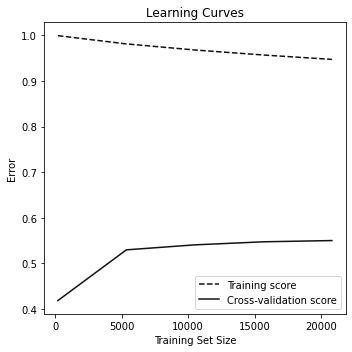

In [44]:
learning_curve_plot(rf, X_train, y_train, scoring = 'accuracy')

<u><b>Insight:</b></u> The model has a variance problem (overfitting), the training error curve remained well below the testing error and did not plateau.

In [45]:
confusion_matrix(y_test, y_pred_rf)

array([[793,  60, 175,  44,  71,  39],
       [ 93, 423, 149,  98, 167,  44],
       [186, 125, 377, 164,  69, 163],
       [ 29,  91, 144, 531, 235,  75],
       [ 76, 114,  63, 132, 756,  38],
       [ 37,  25,  81,  71,  22, 742]])

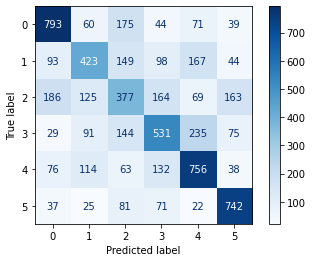

In [46]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap = plt.cm.Blues);

<u><b>Insight:</b></u> We notice that True Positives (i.e., correct predictions) prevail.

In [47]:
print(classification_report(y_test, y_pred_rf))

# the model is better at predicting the class 5 (= 'rock')

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1182
           1       0.50      0.43      0.47       974
           2       0.38      0.35      0.36      1084
           3       0.51      0.48      0.50      1105
           4       0.57      0.64      0.61      1179
           5       0.67      0.76      0.71       978

    accuracy                           0.56      6502
   macro avg       0.55      0.56      0.55      6502
weighted avg       0.55      0.56      0.55      6502



<u><b>Insight:</b></u> It could be seen that the model is not very good at guessing 'pop' music (=class 2) but performs well for 'rock' music (=class 5).

In [48]:
# feature importance plot

def feature_importance_plot(model, X_train, n):
    """Plots feature importance - this only works for Decision Tree based Models"""
    plt.figure(figsize=(8, 5)) # set figure size
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'bar')
    plt.title(f"Top {n} Features") 
    plt.show()

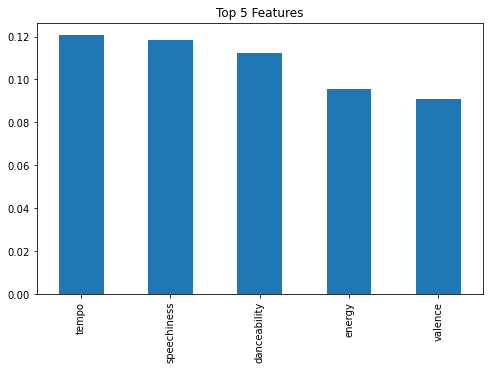

In [49]:
feature_importance_plot(rf, X_train, n = 5)

<u><b>Insight:</b></u> Tree-based algorithms compute feature importance, i.e., how important each feature is for model performance. It seems (see the output above) 'tempo', along with 'speechiness' and 'danceabilty' are the ones that most helped for predicting a song's genre.

### Build and Evaluate the XGBoost Model

In [50]:
# fit the XGBoost model to training data

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [51]:
# make predictions on the test set

y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([0, 0, 0, ..., 0, 5, 5])

In [52]:
# evaluation metrics comparing predictions and actual values

print("accuracy:", round(accuracy_score(y_test, y_pred_xgb), 2))
print("recall:", round(recall_score(y_test, y_pred_xgb, average = 'macro'), 2))
print("precision:", round(precision_score(y_test, y_pred_xgb, average = 'macro'), 2))
print("f1-score:", round(f1_score(y_test, y_pred_xgb, average = 'macro'), 2))


accuracy: 0.55
recall: 0.55
precision: 0.55
f1-score: 0.55


In [53]:
y_pred_train_xgb =xgb.predict(X_train)

print("accuracy:", round(accuracy_score(y_train, y_pred_train_xgb), 2))
print("recall:", round(recall_score(y_train, y_pred_train_xgb, average = 'macro'), 2))
print("precision:", round(precision_score(y_train, y_pred_train_xgb, average = 'macro'), 2))
print("f1-score:", round(f1_score(y_train, y_pred_train_xgb, average = 'macro'), 2))

# signs of overfitting !! 

accuracy: 0.78
recall: 0.78
precision: 0.79
f1-score: 0.78


<u><b>Insight:</b></u> The model obtains 78% "accuracy" and "f1_score" on train data and around 55% on test samples, which is not so good results because it shows signs of overfitting.

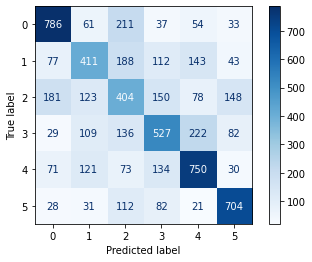

In [54]:
# confusion matrix
ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test, cmap = plt.cm.Blues);

<u><b>Insight:</b></u> We notice that True Positives (i.e., correct predictions) prevail. However, we still see some wrong predictions : in 211 cases it predicted a 'pop' music while it was 'edm'.

In [55]:
# classification report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1182
           1       0.50      0.43      0.47       974
           2       0.38      0.35      0.36      1084
           3       0.51      0.48      0.50      1105
           4       0.57      0.64      0.61      1179
           5       0.67      0.76      0.71       978

    accuracy                           0.56      6502
   macro avg       0.55      0.56      0.55      6502
weighted avg       0.55      0.56      0.55      6502



<u><b>Insight:</b></u> We have noticed that the model is not very good at guessing 'pop' music (=class 2) but performs well for 'rock' music (=class 5) and 'edm' music (=class 0).

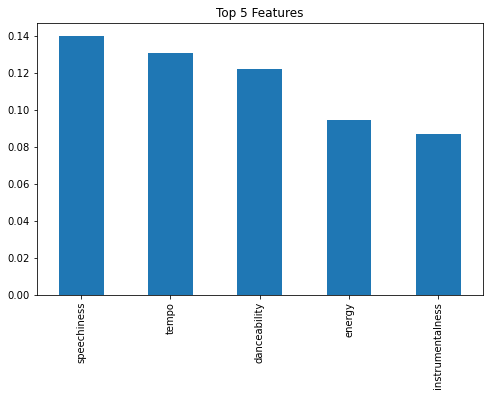

In [56]:
# feature importance plot, exang appears to be the most important feature
# with random forest model the features have higher scores

feature_importance_plot(xgb, X_train, n = 5)

<u><b>Insight:</b></u> For the XGboost model, it seems that 'speechiness' along with 'tempo' and 'danceabilty' are the ones that most helped for predicting a song's genre. <br>

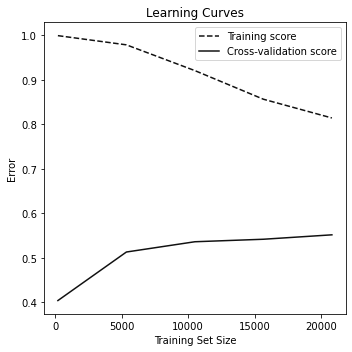

In [57]:
learning_curve_plot(xgb, X_train, y_train, scoring = 'accuracy')

In [58]:
joblib.dump(xgb, 'test_saving')

['test_saving']

## Observations & Conclusions

-According to the importance features plot, we found that the most important features to classify music into a genre are : 'speechiness', 'tempo', 'danceability', 'energy', 'instrumentalness'.
-Feature importance plot displays the same 5 features for both models (Random forest and XGboost), except that for Randomforst the variable 'tempo' is the most importance, while for XGBoost 'speechiness' is. <br>
-Overall Random Forest and XGBoost have higher accuracy scores than Logistic Regression.<br>
-But since Random Forest is badly overfitting, we think that the best performing model is XGBoost.

## Limitations 
-Hyperparameter tuning might be a great way to improve our model (using GridSearch CV, or RandomizedSearchCV), by selecting the best parameters that firts best our data, however this process took an enormous time to be performed.<br>
-This model is only able to predict genres that he was trained on. In order for the model to be able to predict more music genres, we need to train our model on another dataset that contains other music genres, this way this model can be implemented in the company and predict the genre of music of each track. 

## Recommendations
-The training curve for the RandomForest model did not plateau, this suggests that collecting more data might improve model performance.<br>
-In order to improve the performance of our models, we can try to remove the outliers from the most important features so that we can remove some noise around our data.<br>
Example : <br>
    - songs_data_cleaned['loudness']=songs_data_cleaned.loc[songs_data_cleaned['loudness']>-20,'loudness'] <br>
    - songs_data_cleaned['speechiness']=songs_data_cleaned.loc[songs_data_cleaned['speechiness']<0.6,'speechiness']<br>
    <br>
-We can also try more feature cleaning : removing less important features such as 'key', and 'mode'<br>
-Also we can try some more Classification models such as Naive Bayes or Support Vector Machine (SVM)

#### #Hyperparameter tuning#  as this process took an enormous time, this is how we would proceed if we had more time.

In [59]:
#Hyperparameter optimization using GridSearchCV
#import xgboost as xgb
#eval_set = [(X_train, y_train),(X_test,y_test)]

#from sklearn.model_selection import GridSearchCV

#PARAMETERS = {"subsample":[0.5, 0.75, 1],
#"colsample_bytree":[0.5, 0.75, 1],
#"max_depth":[2, 6, 12],
#"min_child_weight":[1,5,15],
#"learning_rate":[0.3, 0.1, 0.03],
#"n_estimators":[100]}

#Initialise XGBoost Model
#model = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
#"""Initialise Grid Search Model to inherit from the XGBoost Model,
#set the of cross validations to 3 per combination and use accuracy
#to score the models."""
#model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=3,scoring="accuracy")
#Fit the model as done previously
#model_gs.fit(X_train,y_train)
#print(model_gs.best_params_)

#predictions = model_gs.predict(X_test)
#print('Accuracy:',accuracy_score(y_test, y_pred_xgb))

In [60]:
#Hyperparameter optimization using RandomizedSearchCV
#from sklearn.model_selection import RandomizedSearchCV
#import xgboost as xgb
#def random_search_tuning():
#    params = {'max_depth': [3, 6, 10, 15],
#              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
#              'subsample': np.arange(0.5, 1.0, 0.1),
#              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
#              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
#              'n_estimators': [100, 250, 500, 750],
#              'num_class': [10]
#              }
#    xgbclf = xgb.XGBClassifier(objective="multi:softmax", tree_method='hist')
#    clf = RandomizedSearchCV(estimator=xgbclf,
#                             param_distributions=params,
#                             scoring='accuracy',
#                             n_iter=25,
#                             n_jobs=4,
#                             verbose=1)
#    clf.fit(X_train, y_train)
    
#    best_combination = clf.best_params_
    
#    return best_combination

#if __name__ == '__main__':

#    best_params = random_search_tuning()

#    print("Best hyperparameter combination: ", best_params)
    #print("Lowest Accuracy: ", (clf.best_score_)

# make predictions with the tuned model

#clf.fit(X_train, y_train)

#y_pred_xgb_tuned = clf.predict(X_test)
#y_pred_xgb_tuned